In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [19]:

df = pd.read_csv('titanic.csv')

In [20]:

numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Sex', 'Pclass', 'Embarked']
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [21]:

X = df[numeric_features + categorical_features]
y = df['Survived']

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [24]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train_processed, y_train)

LogisticRegression(max_iter=1000)

In [25]:

y_pred = model.predict(X_test_processed)

In [26]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



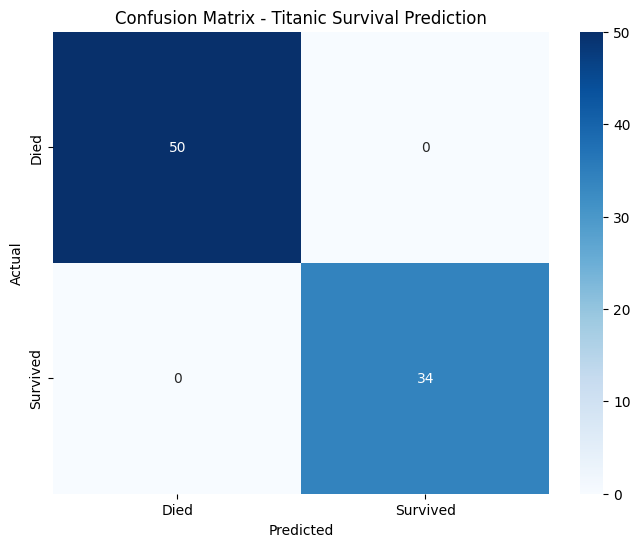

In [27]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Titanic Survival Prediction')
plt.show()

In [28]:

feature_names = (numeric_features + 
                list(preprocessor.named_transformers_['cat']
                    .named_steps['encoder']
                    .get_feature_names_out(categorical_features)))

In [29]:

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

In [30]:

print("\nTop Predictive Features:")
print(coef_df.head(10).to_string(index=False))


Top Predictive Features:
   Feature  Coefficient
  Sex_male    -3.702523
Sex_female     3.696218
Embarked_Q     0.193718
      Fare     0.175718
Embarked_S    -0.121814
Embarked_C    -0.078209
  Pclass_3    -0.076005
  Pclass_1     0.067430
       Age    -0.024178
  Pclass_2     0.002270
